# k-NN & Naive bayes

In [38]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# siapkan data
data = load_breast_cancer()
dataset = pd.DataFrame(data.data, columns=data.feature_names)
dataset['label'] = data.target
dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [21]:
# split dataset
df_train, df_test = train_test_split(dataset, test_size=0.2, random_state=17)

In [22]:
# pisahkan X dan y
# train
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

In [23]:
# test
X_test = df_test.drop('label', axis=1)
y_test = df_test['label']

<AxesSubplot:ylabel='Frequency'>

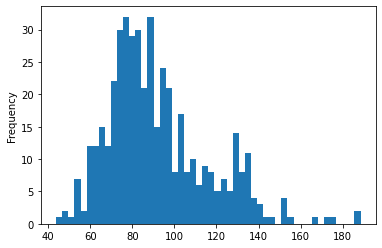

In [24]:
# bukti scaling tidak mengubah data
X_train['mean perimeter'].plot(kind='hist', bins=50)

In [25]:
# scaling
scaler = StandardScaler()
scaler.fit(X_train)

# Transform
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

(array([ 1.,  2.,  1.,  7.,  2., 12., 12., 15., 12., 22., 30., 32., 29.,
        30., 21., 32., 15., 24., 21.,  8., 17.,  8., 10.,  6.,  9.,  8.,
         5.,  7.,  5., 14.,  8., 11.,  4.,  3.,  1.,  1.,  0.,  4.,  1.,
         0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  2.]),
 array([-2.01188141, -1.89101794, -1.77015448, -1.64929102, -1.52842756,
        -1.4075641 , -1.28670064, -1.16583718, -1.04497372, -0.92411026,
        -0.8032468 , -0.68238333, -0.56151987, -0.44065641, -0.31979295,
        -0.19892949, -0.07806603,  0.04279743,  0.16366089,  0.28452435,
         0.40538782,  0.52625128,  0.64711474,  0.7679782 ,  0.88884166,
         1.00970512,  1.13056858,  1.25143204,  1.3722955 ,  1.49315896,
         1.61402243,  1.73488589,  1.85574935,  1.97661281,  2.09747627,
         2.21833973,  2.33920319,  2.46006665,  2.58093011,  2.70179357,
         2.82265704,  2.9435205 ,  3.06438396,  3.18524742,  3.30611088,
         3.42697434,  3.5478378 ,  3.66870126,  3.78956472,

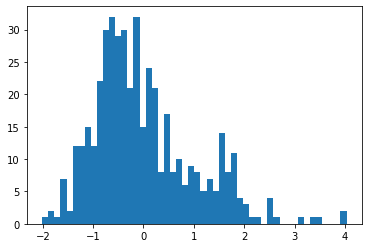

In [26]:
plt.hist(X_train_scaled[:,2], bins=50)

## k-NN

In [27]:
# training - latihan soal
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [28]:
# proses testing - ujian
y_pred = knn.predict(X_test_scaled)

In [29]:
# nilai
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93        38
           1       0.96      0.97      0.97        76

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



akurasi : 96%, model kita berarti bagus.

## Naive Bayes

In [31]:
# training
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

GaussianNB()

In [32]:
# proses testing
y_pred = nb.predict(X_test_scaled)

In [33]:
# nilai
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        38
           1       0.95      0.93      0.94        76

    accuracy                           0.92       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



akurasi : 94%, lebih bagus k-NN

### Waktu eksekusi

In [36]:
# training knn
knn = KNeighborsClassifier(n_neighbors=3)
%timeit knn.fit(X_train_scaled, y_train)

275 µs ± 61.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [39]:
# training knn
logreg = LogisticRegression()
%timeit logreg.fit(X_train_scaled, y_train)

10.4 ms ± 1.82 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [40]:
%timeit y_pred = knn.predict(X_test_scaled)

6.87 ms ± 2.03 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [41]:
%timeit y_pred = logreg.predict(X_test_scaled)

71.5 µs ± 10.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


- knn tidak cocok untuk data yg besar